In [ ]:
import pandas as pd
from iminuit import Minuit 
from iminuit.cost import LeastSquares
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


def retta (x,a,b):
    return (a*x + b)


def read():
    X = []
    S = []
    Z = pd.read_csv('F_Vb.CSV')
    for i in range(len(Z.columns.values)):
        if i != 0:
            z = Z.iloc[:, i]
            x = float(np.mean(z))
            if x >= 30:
                X.append(x)
                s = float(np.std(z))
                S.append(s)
    return (X, S)


def graph(X, S):
    Y = [52.5, 53, 53.5, 53.8, 54, 54.3, 54.5, 54.8, 55, 55.3, 55.5, 55.8, 56]
    Z = np.linspace(50, 56, 100000)
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    plt.plot(Z, retta(Z, 27.95, -1401))
    ax.scatter(Y, X)
    ax.errorbar(Y, X, S)
    plt.show()


def analisi(X, S):


    Y = [54, 54.3, 54.5, 54.8, 55, 55.3, 55.5, 55.8, 56]
    L_S = LeastSquares(Y, X, S, retta)
    my_minuit = Minuit (L_S, a = 0, b = 0)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]

#visualizzazione 
    display(my_minuit)

S = read()
print(S)
'graph(S[0], S[1])'
analisi(S[0], S[1])


([55.922000000000004, 70.1335, 75.21105, 83.32115, 88.12, 95.24095, 100.82049999999998, 107.0449, 111.93100000000003], [0.551654783356403, 0.610617924728712, 0.6108225171848204, 0.5508583552057643, 0.6069398652255422, 0.7060239709103364, 0.6896355921789417, 0.6761168464104412, 0.7845224662175068])
Validità:  True
Q-squared:  99.22044732424828
DOF:  7.0
P value:  0.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 99.22 (χ²/ndof = 14.2)     │              Nfcn = 57               │
│ EDM = 2.25e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   27.05   │   0.34    │            │            │         │         │       │
│ 1 │ b    │ -1.401e3  │  0.018e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.112 -6.16 │
│ b │ -6.16   338 │
└───┴─────────────┘

In [17]:
def intercetta():
    Z = []
    X = np.linspace(40, 56, 100000000)
    for i in range(len(X)):
        y = float(retta(X[i], 27.05, -1401))
        if y <= 0.000001:
            if y >= -0.000001:
                Z.append(X[i])
    print(np.max(Z))
    print(Z)

intercetta()  


51.792975957929755
[np.float64(51.792975957929755)]


In [38]:
def read1():
    X = []
    S = []
    Z = pd.read_csv('F_Vb.CSV')
    for i in range(len(Z.columns.values)):
        if i != 0:
            z = Z.iloc[:, i]
            x = float(np.mean(z))
            X.append(x)
            s = float(np.std(z))
            S.append(s)
    return (X, S)


def graph(X, S):
    Y = [52.5, 53, 53.5, 53.8, 54, 54.3, 54.5, 54.8, 55, 55.3, 55.5, 55.8, 56]
    Z = np.linspace(51.5, 56, 100000)
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    plt.plot(Z, retta(Z, 27.05, -1401))
    ax.scatter(Y, X, color = 'black')
    #ax.errorbar(Y, X, S)
    plt.show()

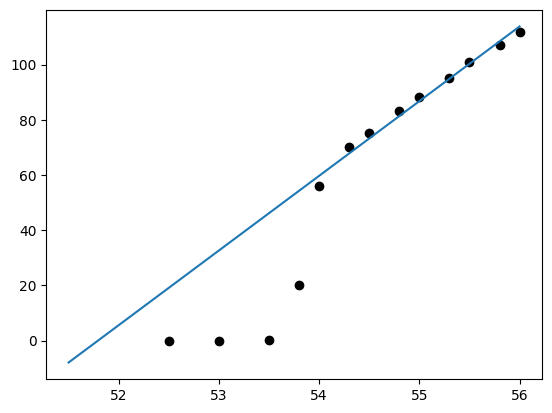

In [39]:
K = read1()
graph(K[0], K[1])